<a href="https://colab.research.google.com/github/AreebaMandavia/Heart-Failure-Risk-Prediction/blob/main/HeartFailurePrediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.svm import SVC
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
df=pd.read_csv('heart_disease_data.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


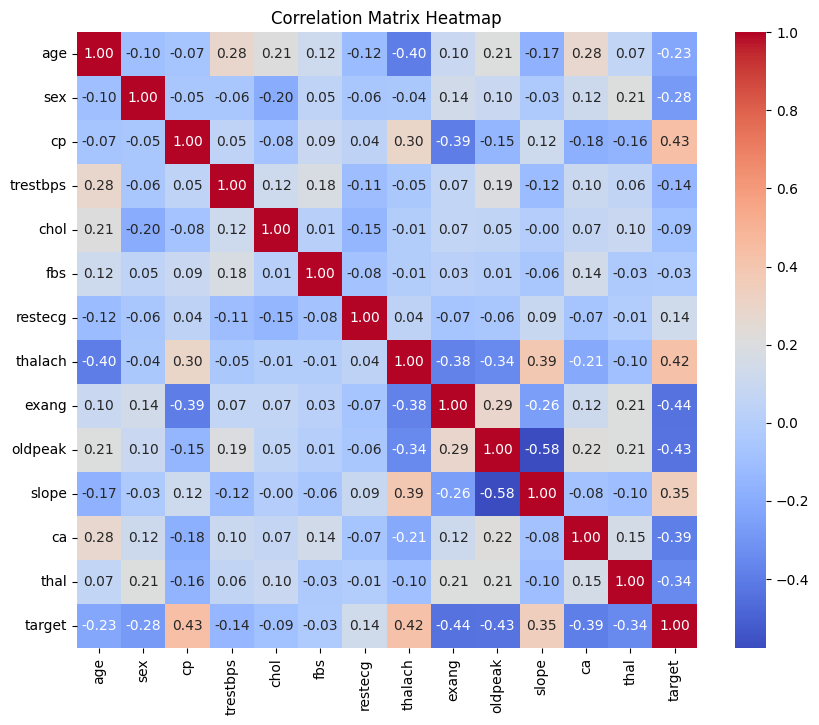

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


Train Test Split

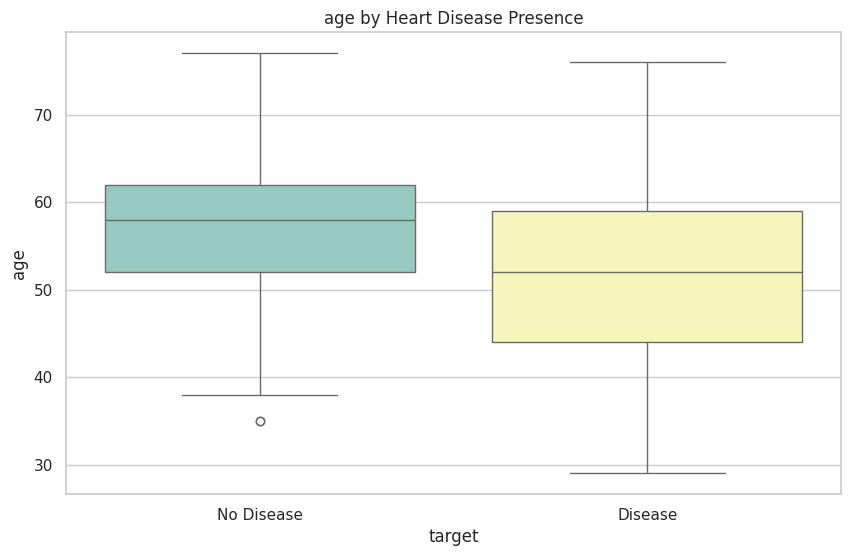

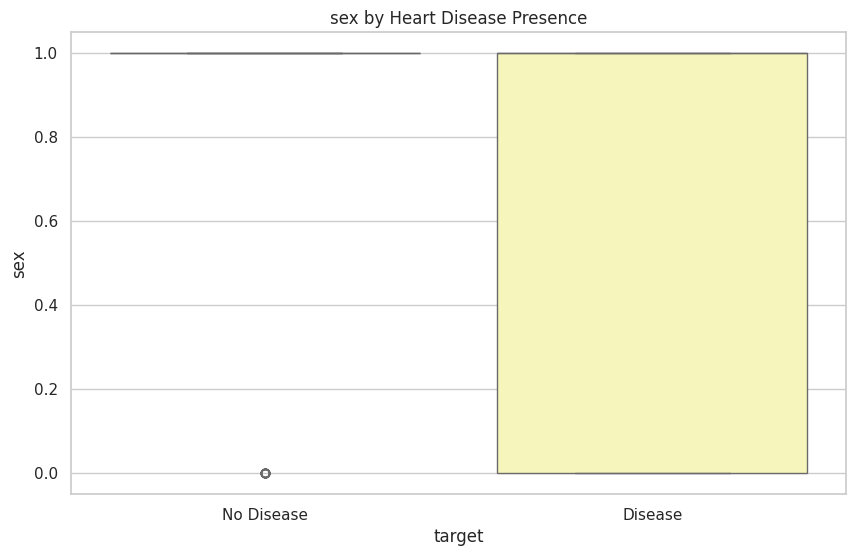

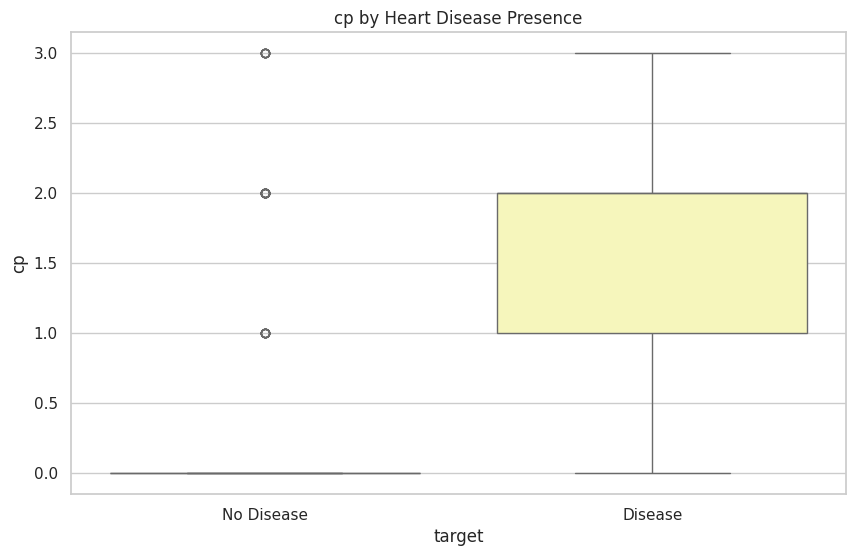

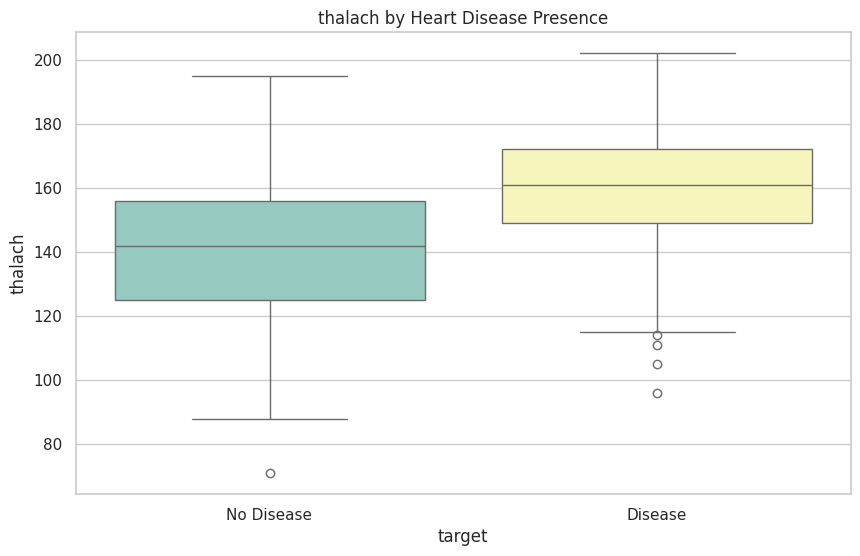

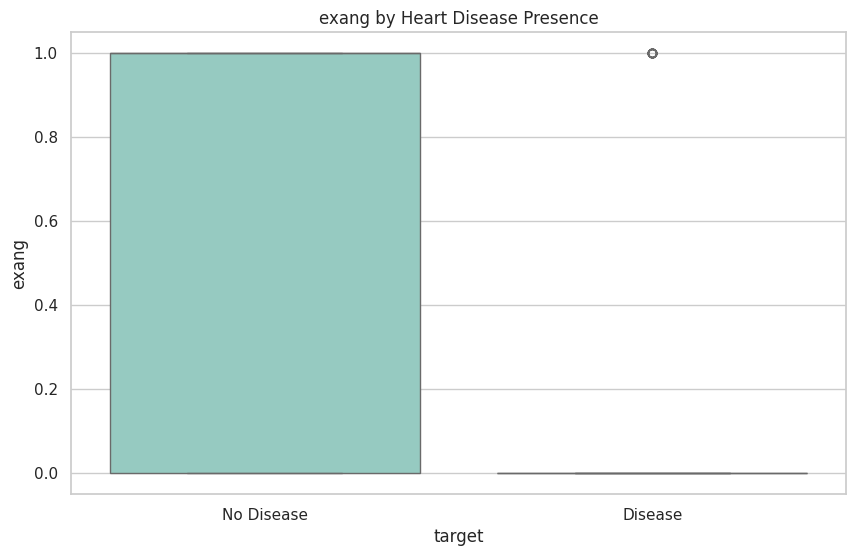

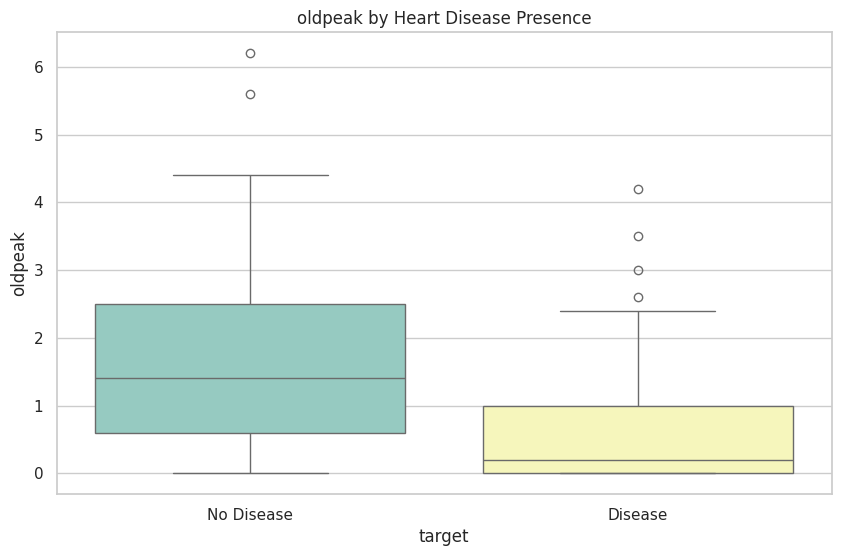

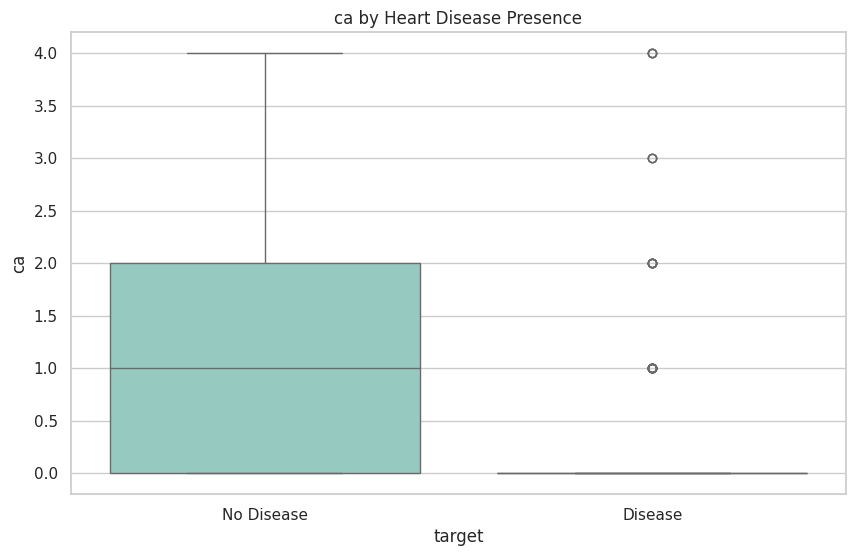

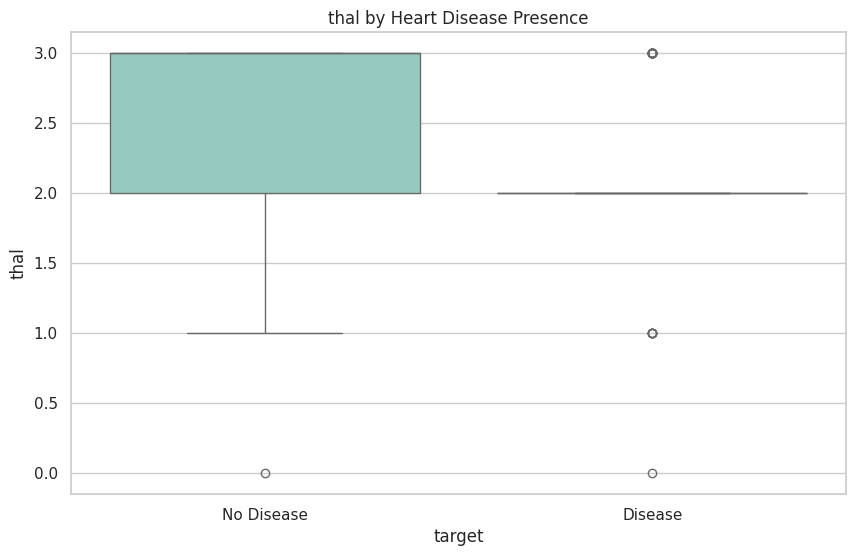

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

key_features = ['age', 'sex', 'cp', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']

for feature in key_features:
    plt.figure()
    sns.boxplot(x='target', y=feature, data=df, hue='target', palette='Set3', dodge=False)
    plt.title(f'{feature} by Heart Disease Presence')
    plt.xticks([0, 1], ['No Disease', 'Disease'])
    plt.legend([],[], frameon=False)


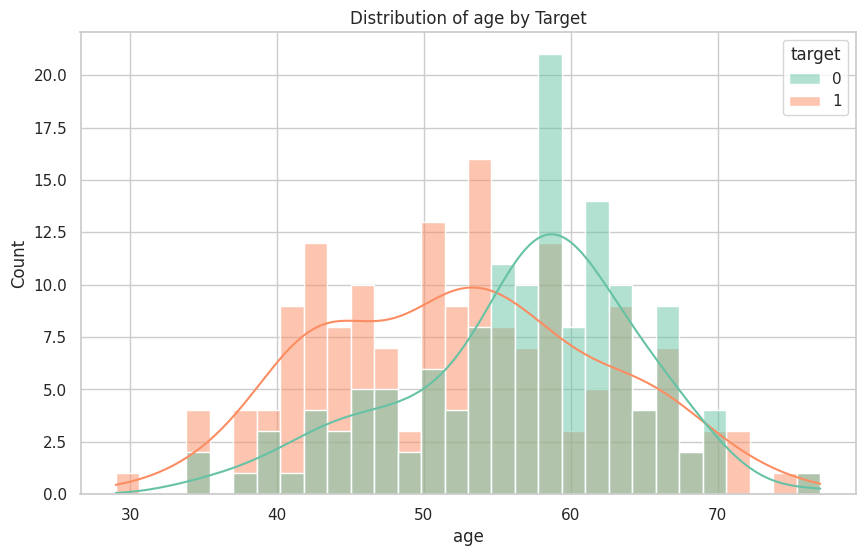

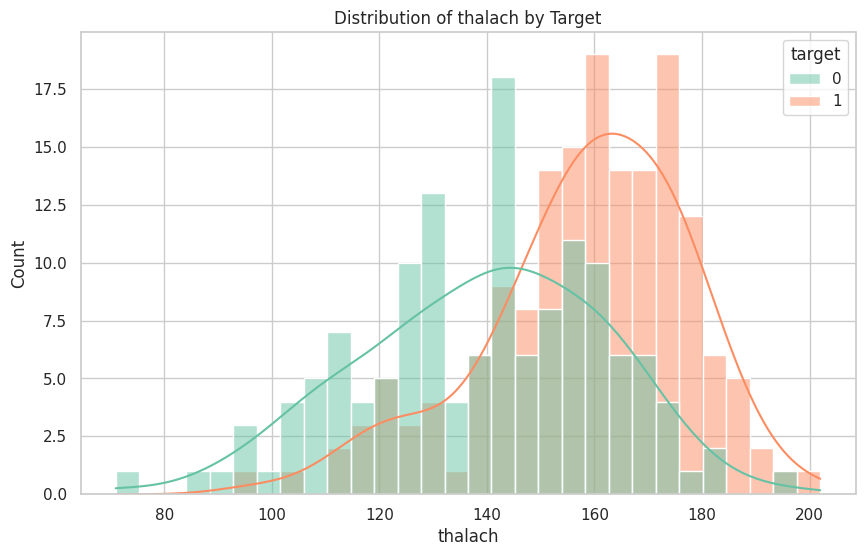

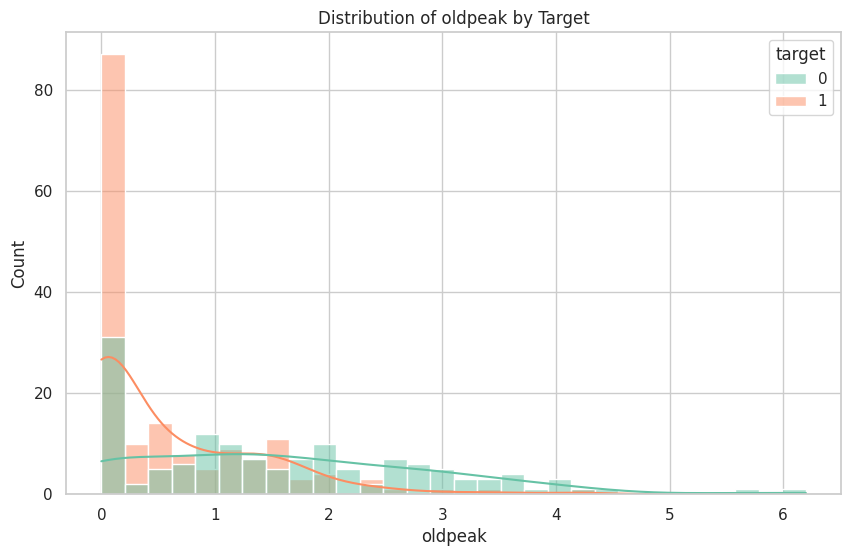

In [ ]:
for feature in ['age', 'thalach', 'oldpeak']:
    plt.figure()
    sns.histplot(data=df, x=feature, hue='target', kde=True, palette='Set2', bins=30)
    plt.title(f'Distribution of {feature} by Target')
    plt.show()


In [ ]:
categorical = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for col in categorical:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())



sex value counts:
sex
1    207
0     96
Name: count, dtype: int64

cp value counts:
cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

fbs value counts:
fbs
0    258
1     45
Name: count, dtype: int64

restecg value counts:
restecg
1    152
0    147
2      4
Name: count, dtype: int64

exang value counts:
exang
0    204
1     99
Name: count, dtype: int64

slope value counts:
slope
2    142
1    140
0     21
Name: count, dtype: int64

ca value counts:
ca
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64

thal value counts:
thal
2    166
3    117
1     18
0      2
Name: count, dtype: int64


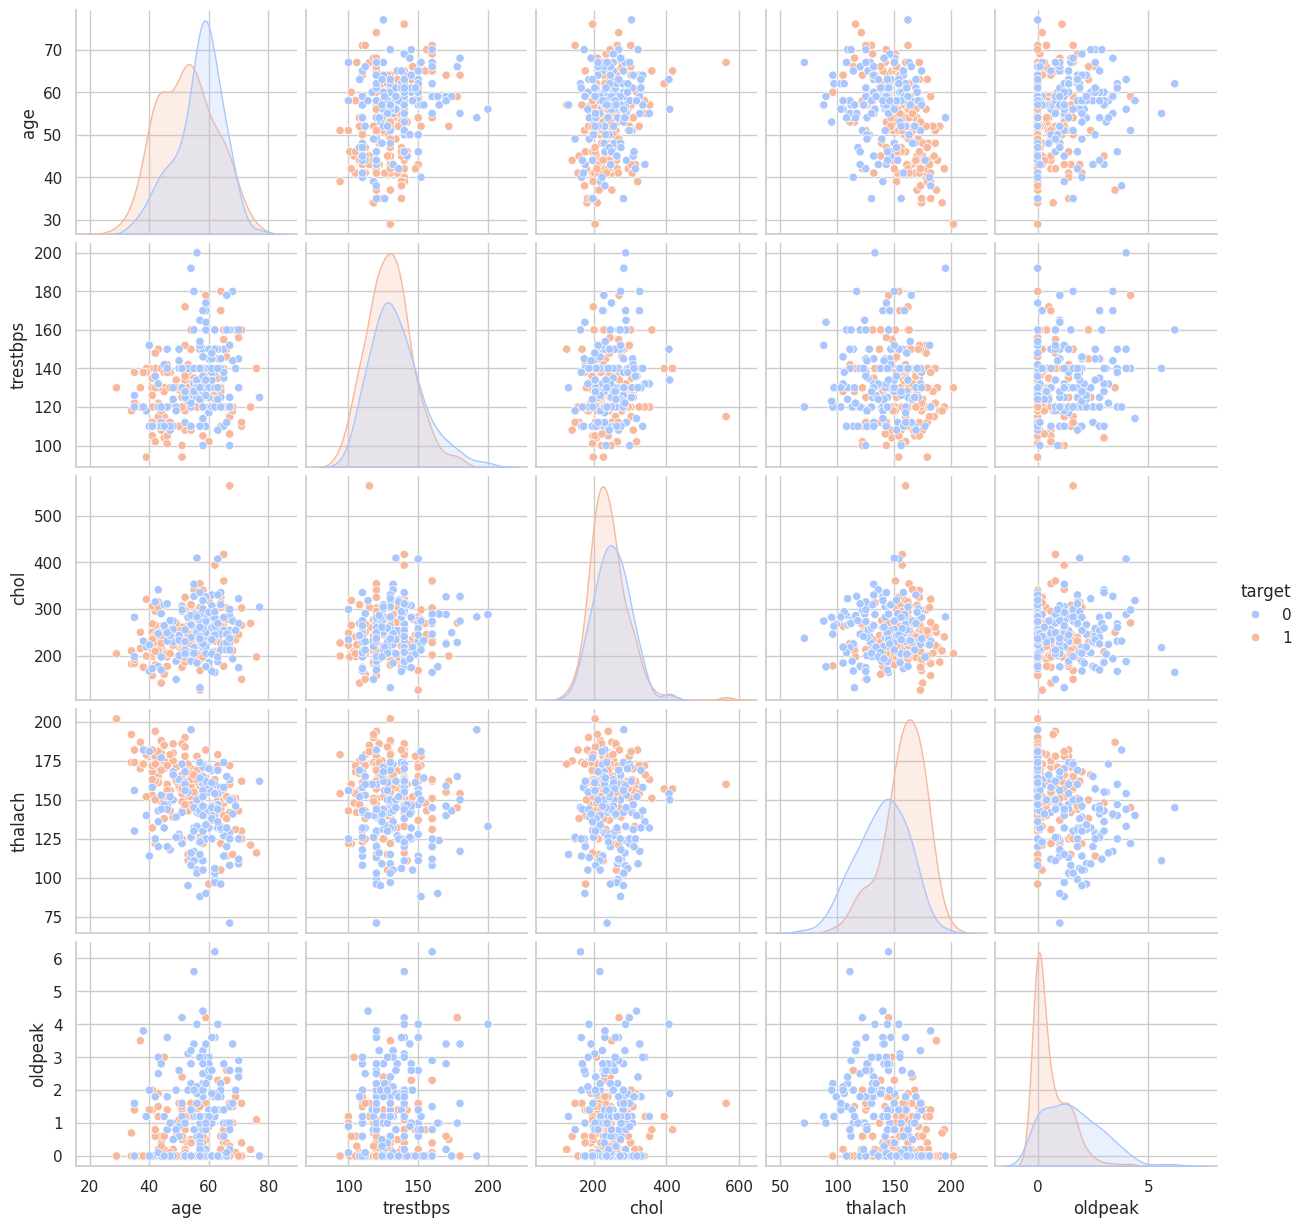

In [ ]:
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']], hue='target', palette='coolwarm')
plt.show()


In [ ]:
y=df['target']
target_temp=df.target.value_counts()
print(target_temp)

target
1    165
0    138
Name: count, dtype: int64


In [ ]:

print("Percentage of patients without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patients with heart problems: "+str(round(target_temp[1]*100/303,2)))

print("Percentage of patients with heart problems: "+str(y.where(y==1).count()*100/303))
print("Percentage of patients with heart problems: "+str(y.where(y==0).count()*100/303))

countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])

Percentage of patients without heart problems: 45.54
Percentage of patients with heart problems: 54.46
Percentage of patients with heart problems: 54.45544554455446
Percentage of patients with heart problems: 45.54455445544554


In [ ]:
df["sex"].unique()


array([1, 0])

<ipython-input-23-41bb00412335>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["sex"], y=y, palette=["#FF9999", "#66B3FF"])


<Axes: xlabel='sex', ylabel='target'>

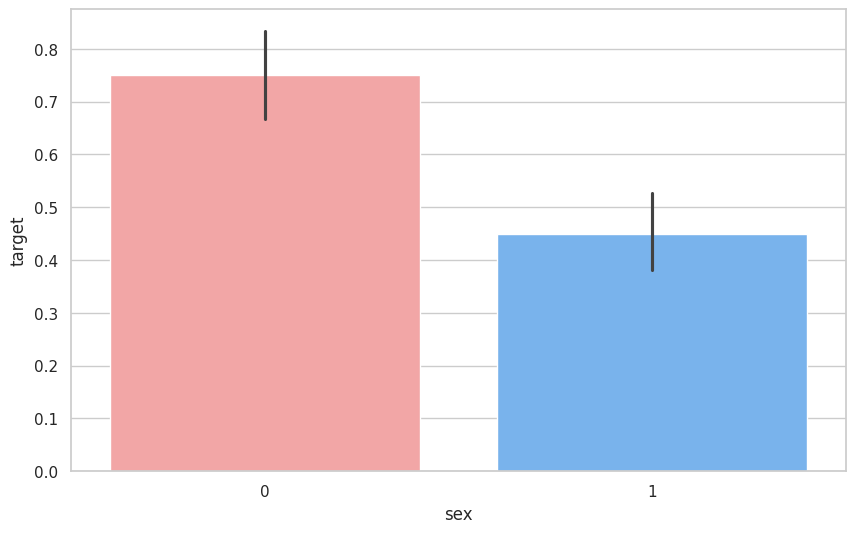

In [ ]:
sns.barplot(x=df["sex"], y=y, palette=["#FF9999", "#66B3FF"])

In [ ]:
x=df.drop('target',axis=1)
y=df['target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Logistic Regression

In [ ]:

lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8852459016393442
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Naive Bayes

In [ ]:
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.8688524590163934


SVM

In [ ]:

svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.7049180327868853


XBoost

In [ ]:

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(x_train, y_train)

Y_pred_xgb = xgb_model.predict(x_test)


In [ ]:
Y_pred_xgb.shape


(61,)

In [ ]:
score_xgb = round(accuracy_score(Y_pred_xgb,y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")



The accuracy score achieved using XGBoost is: 81.97 %


Neural Network

In [ ]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.fit(x_train,y_train,epochs=300)


Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4403 - loss: 15.3933
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4098 - loss: 6.0675 
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5105 - loss: 3.5067 
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5174 - loss: 3.3167 
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4121 - loss: 2.3896 
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4184 - loss: 2.2801 
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4835 - loss: 2.0290 
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4189 - loss: 1.4448 
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4071 - loss: 1.3269 
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4671 - loss: 1.1424 
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3979 - loss: 1.0546 
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5141 - los

In [ ]:

Y_pred_nn = model.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [ ]:
Y_pred_nn.shape

(61, 1)

In [ ]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded


In [ ]:

score_nn = round(accuracy_score(Y_pred_nn,y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")


The accuracy score achieved using Neural Network is: 80.33 %


K Nearest Neighbors

In [ ]:

from sklearn.neighbors import KNeighborsClassifier

X = df.drop('target', axis=1)
y = df['target']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7049180327868853
Confusion Matrix:
 [[19 10]
 [ 8 24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.66      0.68        29
           1       0.71      0.75      0.73        32

    accuracy                           0.70        61
   macro avg       0.70      0.70      0.70        61
weighted avg       0.70      0.70      0.70        61



Decision Tree

In [ ]:

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,y_train)
Y_pred_dt = dt.predict(X_test)

In [ ]:
print(Y_pred_dt.shape)

(61,)


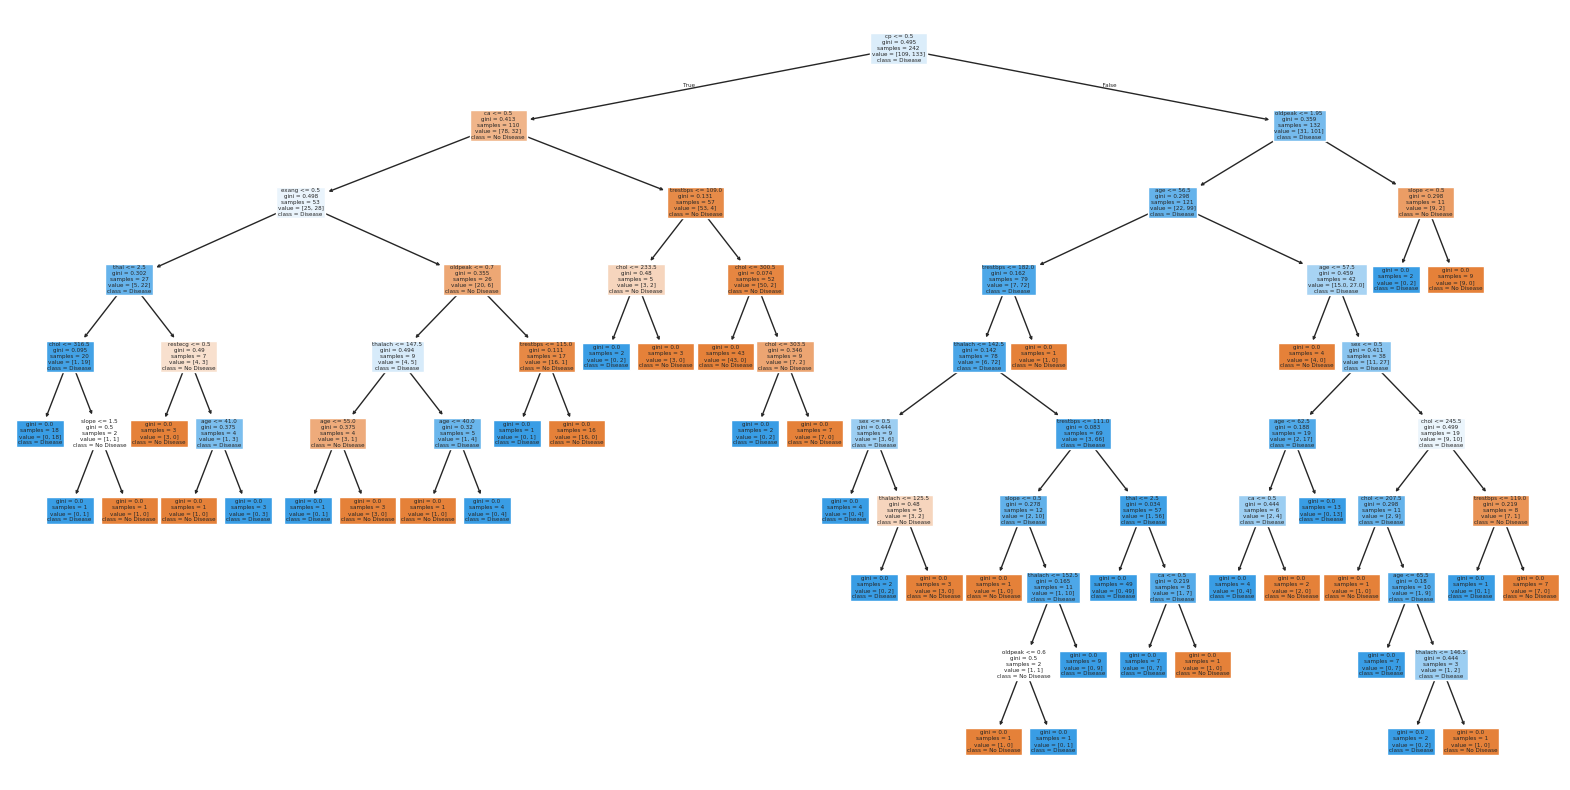

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.show()

In [ ]:
score_dt = round(accuracy_score(Y_pred_dt,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 85.25 %


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x


rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,y_train)
Y_pred_rf = rf.predict(X_test)

In [ ]:
Y_pred_rf.shape

(61,)

In [ ]:
score_rf = round(accuracy_score(Y_pred_rf,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 88.52 %
